<a href="https://colab.research.google.com/github/pratikshamayannavar/Maximizing_revenue_taxi/blob/main/Hypothesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("/content/yellow_tripdata_2020-01.csv")
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2020-01-01 00:28:15,2020-01-01 00:33:03,1,1.2,1.0,N,238.0,239.0,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1,1.2,1.0,N,239.0,238.0,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1,2020-01-01 00:47:41,2020-01-01 00:53:52,1,0.6,1.0,N,238.0,238.0,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1,2020-01-01 00:55:23,2020-01-01 01:00:14,1,0.8,1.0,N,238.0,151.0,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2,2020-01-01 00:01:58,2020-01-01 00:04:16,1,0.0,1.0,N,193.0,193.0,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


Exploratory data analysis

In [ ]:
df.shape

(2806607, 18)

In [ ]:
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          1
trip_distance            1
RatecodeID               1
store_and_fwd_flag       1
PULocationID             1
DOLocationID             1
payment_type             1
fare_amount              1
extra                    1
mta_tax                  1
tip_amount               1
tolls_amount             1
improvement_surcharge    1
total_amount             1
congestion_surcharge     1
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
dtype: int64

In [ ]:
df.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID             float64
DOLocationID             float64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [ ]:
df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'])

In [ ]:
df['duration']=df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1,2020-01-01 00:28:15,2020-01-01 00:33:03,1,1.2,1.0,N,238.0,239.0,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,0 days 00:04:48
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1,1.2,1.0,N,239.0,238.0,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,0 days 00:07:25
2,1,2020-01-01 00:47:41,2020-01-01 00:53:52,1,0.6,1.0,N,238.0,238.0,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,0 days 00:06:11
3,1,2020-01-01 00:55:23,2020-01-01 01:00:14,1,0.8,1.0,N,238.0,151.0,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,0 days 00:04:51
4,2,2020-01-01 00:01:58,2020-01-01 00:04:16,1,0.0,1.0,N,193.0,193.0,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,0 days 00:02:18


In [ ]:
df['duration']=df['duration'].dt.total_seconds()/60

In [ ]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1,2020-01-01 00:28:15,2020-01-01 00:33:03,1,1.2,1.0,N,238.0,239.0,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,4.800000
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1,1.2,1.0,N,239.0,238.0,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,7.416667
2,1,2020-01-01 00:47:41,2020-01-01 00:53:52,1,0.6,1.0,N,238.0,238.0,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,6.183333
3,1,2020-01-01 00:55:23,2020-01-01 01:00:14,1,0.8,1.0,N,238.0,151.0,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,4.850000
4,2,2020-01-01 00:01:58,2020-01-01 00:04:16,1,0.0,1.0,N,193.0,193.0,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,2.300000


In [ ]:
df=df[['passenger_count','payment_type','trip_distance','fare_amount','duration']]
df

,passenger_count,payment_type,trip_distance,fare_amount,duration
0,1,1.0,1.20,6.0,4.800000
1,1,1.0,1.20,7.0,7.416667
2,1,1.0,0.60,6.0,6.183333
3,1,1.0,0.80,5.5,4.850000
4,1,2.0,0.00,3.5,2.300000
...,...,...,...,...,...
113391,1,1.0,8.85,27.5,24.250000
113392,1,1.0,1.04,6.5,6.733333
113393,1,1.0,17.97,52.0,34.350000
113394,1,1.0,0.89,5.5,4.933333


In [ ]:
df['passenger_count']=df['passenger_count'].astype('int64')
df['payment_type']=df['payment_type'].astype('int64')

In [ ]:
df.head()

,passenger_count,payment_type,trip_distance,fare_amount,duration
0,1,1,1.2,6.0,4.800000
1,1,1,1.2,7.0,7.416667
2,1,1,0.6,6.0,6.183333
3,1,1,0.8,5.5,4.850000
4,1,2,0.0,3.5,2.300000


In [ ]:
df[df.duplicated()]

,passenger_count,payment_type,trip_distance,fare_amount,duration
2056,1,2,0.00,7.0,0.000000
2441,1,1,0.00,52.0,0.200000
2446,2,1,1.70,9.5,13.066667
2465,1,1,0.40,4.0,3.083333
3344,1,1,1.20,6.0,5.350000
...,...,...,...,...,...
113370,1,2,0.40,4.0,2.950000
113373,1,2,2.17,10.5,12.866667
113377,2,2,1.20,6.5,5.700000
113389,1,1,0.58,4.5,3.350000


In [ ]:
df['passenger_count'].value_counts(normalize=True)

passenger_count
1    0.638612
2    0.193781
3    0.056792
5    0.039499
4    0.033740
6    0.021941
0    0.015574
8    0.000044
7    0.000009
9    0.000009
Name: proportion, dtype: float64

In [ ]:
df['payment_type'].value_counts(normalize=True)

payment_type
1    0.649988
2    0.339192
3    0.006473
4    0.004348
Name: proportion, dtype: float64

In [ ]:
df=df[df['payment_type']<3]

In [ ]:
df=df[(df['passenger_count']>0) & (df['passenger_count']<6)]

In [ ]:
df['payment_type'].replace([1,2],['card','cash'], inplace=True)

In [ ]:

df.describe()

,passenger_count,trip_distance,fare_amount,duration
count,107974.000000,107974.000000,107974.000000,107974.000000
mean,1.589818,3.376857,13.658155,17.246662
std,1.032200,3.983656,13.002031,82.026737
min,1.000000,0.000000,-110.000000,0.000000
25%,1.000000,1.100000,6.500000,5.933333
50%,1.000000,1.970000,9.500000,10.150000
75%,2.000000,3.930000,16.000000,16.733333
max,5.000000,100.150000,400.000000,1439.600000


In [ ]:
df=df[df['fare_amount']>0]
df=df[df['trip_distance']>0]
df=df[df['duration']>0]

In [ ]:
df

,passenger_count,payment_type,trip_distance,fare_amount,duration
0,1,card,1.20,6.0,4.800000
1,1,card,1.20,7.0,7.416667
2,1,card,0.60,6.0,6.183333
3,1,card,0.80,5.5,4.850000
5,1,cash,0.03,2.5,0.883333
...,...,...,...,...,...
113391,1,card,8.85,27.5,24.250000
113392,1,card,1.04,6.5,6.733333
113393,1,card,17.97,52.0,34.350000
113394,1,card,0.89,5.5,4.933333


{'whiskers': [<matplotlib.lines.Line2D at 0x7a6af661c4c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7a6af661ca00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a6af661c220>],
 'medians': [<matplotlib.lines.Line2D at 0x7a6af661cf40>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a6af661d1e0>],
 'means': []}

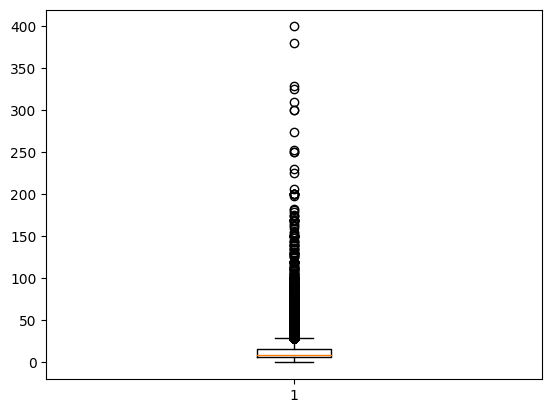

In [ ]:
plt.boxplot(df['fare_amount'])

In [ ]:
for col in ['fare_amount','trip_distance','duration']:
  q1=df[col].quantile(0.25)
  q3=df[col].quantile(0.75)
  IQR=q3-q1
  lower_bound=q1-1.5*IQR
  upper_bound=q3+1.5*IQR

  df=df[(df[col]>=lower_bound) & (df[col]<=upper_bound)]

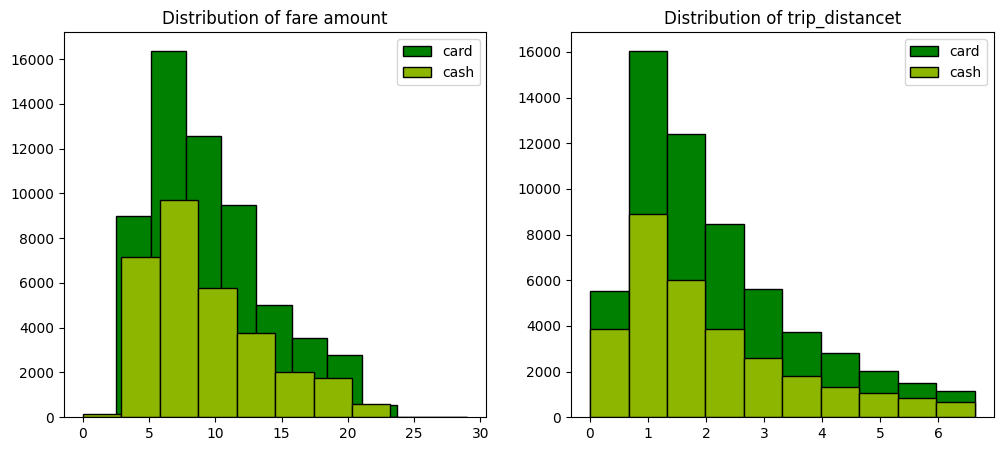

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Distribution of fare amount")
plt.hist(df[df['payment_type']=='card']['fare_amount'],histtype='barstacked',edgecolor='k',label='card',color='#008000')
plt.hist(df[df['payment_type']=='cash']['fare_amount'],histtype='barstacked',edgecolor='k',label='cash',color='#8db600')
plt.legend()

plt.subplot(1,2,2)
plt.title("Distribution of trip_distancet")
plt.hist(df[df['payment_type']=='card']['trip_distance'],histtype='barstacked',edgecolor='k',label='card',color='#008000')
plt.hist(df[df['payment_type']=='cash']['trip_distance'],histtype='barstacked',edgecolor='k',label='cash',color='#8db600')
plt.legend()
plt.show()


In [ ]:
df

,passenger_count,payment_type,trip_distance,fare_amount,duration
0,1,card,1.20,6.0,4.800000
1,1,card,1.20,7.0,7.416667
2,1,card,0.60,6.0,6.183333
3,1,card,0.80,5.5,4.850000
5,1,cash,0.03,2.5,0.883333
...,...,...,...,...,...
113389,1,card,0.58,4.5,3.350000
113390,1,cash,0.67,4.5,3.016667
113392,1,card,1.04,6.5,6.733333
113394,1,card,0.89,5.5,4.933333


In [ ]:
df.groupby('payment_type').agg({'fare_amount':['mean','std'],'trip_distance':['mean','std']})

fare_amount           trip_distance         
                    mean       std          mean      std
payment_type                                             
card            9.569523  4.402518      2.132839  1.42000
cash            9.336778  4.487954      2.055701  1.47503

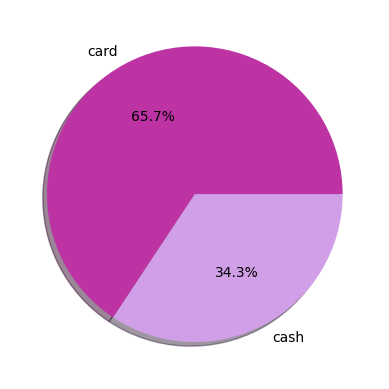

In [ ]:
plt.title('Preference of Payment Type')
plt.pie(df['payment_type'].value_counts(normalize=True),labels=df['payment_type'].value_counts().index,shadow=True,autopct='%1.1f%%',colors=['#bd33a4','#d19fe8'])
plt.show()

In [ ]:
passenger_count=df.groupby(['payment_type','passenger_count'])[['passenger_count']].count()
passenger_count.rename(columns={'passenger_count':'count'},inplace=True)
passenger_count.reset_index(inplace=True)

In [ ]:
passenger_count['perc']=(passenger_count['count']/passenger_count['count'].sum())*100
passenger_count

,payment_type,passenger_count,count,perc
0,card,1,39676,43.937984
1,card,2,12055,13.349945
2,card,3,3295,3.648948
3,card,4,1753,1.941307
4,card,5,2542,2.815061
5,cash,1,20548,22.755260
6,cash,2,5968,6.609081
7,cash,3,1949,2.158361
8,cash,4,1287,1.425249
9,cash,5,1227,1.358804


In [ ]:
data=pd.DataFrame(columns=['payment_type',1,2,3,4,5])
data['payment_type']=['card','cash']
data.iloc[0,1:]=passenger_count.iloc[0:5,-1]
data.iloc[1,1:]=passenger_count.iloc[5:,-1]
data

,payment_type,1,2,3,4,5
0,card,43.937984,13.349945,3.648948,1.941307,2.815061
1,cash,22.75526,6.609081,2.158361,1.425249,1.358804


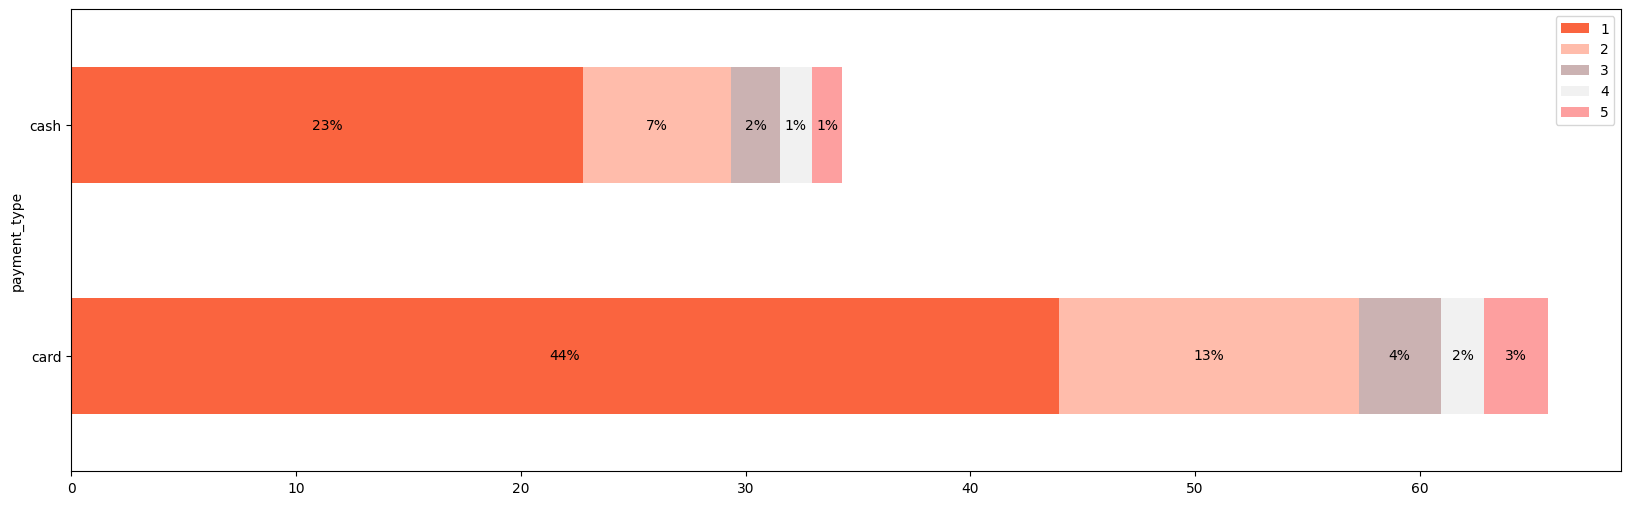

In [ ]:
fig, ax=plt.subplots(figsize=(20,6))
data.plot(x='payment_type',kind='barh',stacked=True,ax=ax,color=['#FA643F','#FFBCAB','#CBB2B2','#F1F1F1','#FD9F9F'])

###Add percentage
for p in ax.patches:
  width=p.get_width()
  height=p.get_height()
  x,y=p.get_xy()
  ax.text(x+width/2,
          y+height/2,
          '{:.0f}%'.format(width),
          horizontalalignment='center',
          verticalalignment='center')

**Null hypothesis:** There is no difference in average fare between customer who uses credit card and customers who use cash.

**Alternative hypothesis:** There is a difference in average fare between customer who uses credit card and customers who use cash.

In [ ]:
card_sample=df[df['payment_type']=='card']['fare_amount']
cash_sample=df[df['payment_type']=='cash']['fare_amount']

In [ ]:
t_stats, p_value= stats.ttest_ind(a=card_sample,b=cash_sample,equal_var=False)
print('T statistic is',t_stats, 'p value is',p_value)

T statistic is 62.67568501587661 p value is 0.0
